In [1]:
%matplotlib inline
import numpy as np
from nicks_plot_utils import Hist1D, Hist2D
import matplotlib.pyplot as plt
import pandas as pd
from lmfit.models import *

In [2]:
mu = 0.0
sigma = 0.2
num = 1_000_000_000

data = pd.DataFrame({'x' : np.random.normal(mu, sigma, num),
                     'y' : np.random.normal(mu+0.2, sigma, num),
                     'z' : np.random.normal(mu-0.5, 0.5, num)})

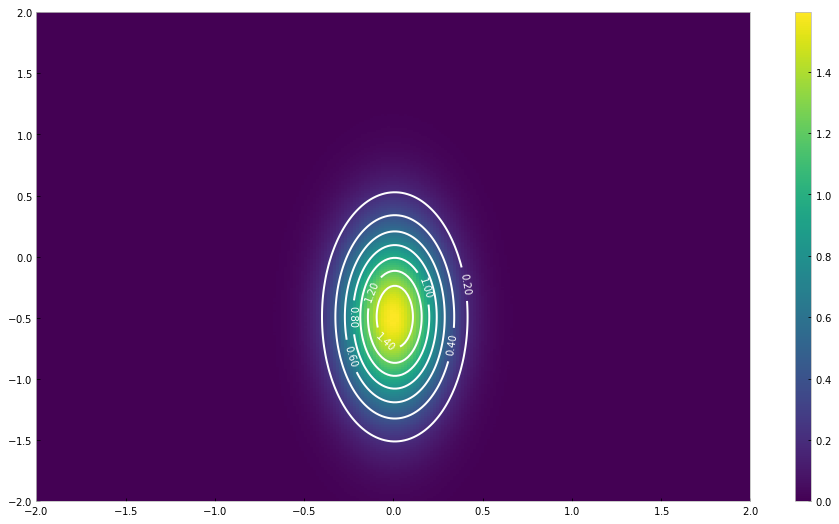

In [3]:
testHist = Hist2D(xrange=[-2.0,2.0], xbins=250, yrange=[-2.0,2.0], ybins=250)
testHist.fill(data.x, data.z)
testHist.plot()
testHist.fitGausian(label=True)

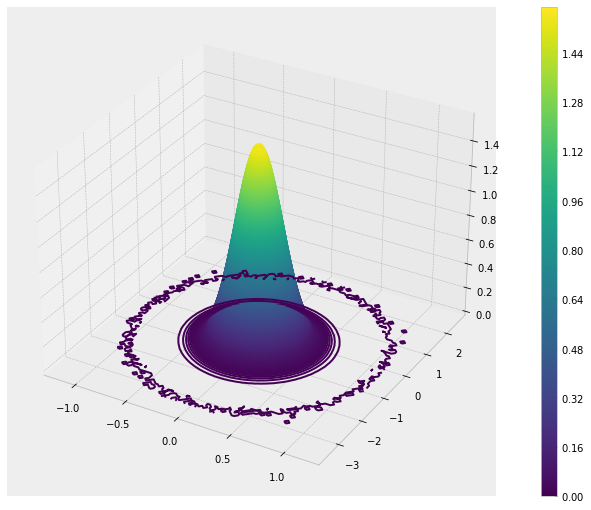

In [4]:
testHist = Hist2D(data.x, data.z)
testHist.plot3D(zeros=True)